### Auteur:
Sarra Mars & Zihao GUO

In [1]:
import keras as ks
import pandas as pd
import numpy as np

# Pré-processing de textes

Cette [page](https://keras.io/preprocessing/text/) détaille les méthodes de pré-processing de texte avec Keras et présente notamment la classe Tokenizer.

> Completer le code ci-dessous pour créer un analyseur lexical (tokenizer) avec keras.

In [2]:
from keras.preprocessing.text import Tokenizer

samples = ['je suis un étudiant de Nantes.',
           'Je ne manque jamais les cours de machine learning!',
           'je suis étudiant à Centrale', 
           'je suis jeune', 
           'je mange pasta']

### ne conserver que 1000 mots dans le corpus :
mon_tokenizer = Tokenizer(num_words=1000, 
                filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') 

mon_tokenizer.fit_on_texts(samples)

> Quel est l'index du mot "machine" dans cet encodage ?

In [3]:
### TO DO ###
print(mon_tokenizer.word_index)

{'je': 1, 'suis': 2, 'étudiant': 3, 'de': 4, 'un': 5, 'nantes': 6, 'ne': 7, 'manque': 8, 'jamais': 9, 'les': 10, 'cours': 11, 'machine': 12, 'learning!': 13, 'à': 14, 'centrale': 15, 'jeune': 16, 'mange': 17, 'pasta': 18}


> Afficher la liste des termes de ponctuations qui sont retirés par le Tokenizer. Modifier le fitre pour ne pas retirer le point d'exclamation.  

In [4]:
### TO DO ###
print(mon_tokenizer.filters)

"#$%&()*+,-./:;<=>?@[\]^_`{|}~	



> Transformer maintenant les mots en listes d'entiers avec la méthode `texts_to_sequences()` de la classe Tokenizer.

In [5]:
sequences = mon_tokenizer.texts_to_sequences(samples)
print(sequences)

[[1, 2, 5, 3, 4, 6], [1, 7, 8, 9, 10, 11, 4, 12, 13], [1, 2, 3, 14, 15], [1, 2, 16], [1, 17, 18]]


# Word Embeddings (plongement des mots)

Il existe deux façons d'obtenir des embeddings de mots:

- On peut apprendre un plongement pour une tache bien précise en amont (comme la classification des documents ou la prédiction des sentiments). Dans ce cas, on apprend le plongement comme on le fait pour un réseau de neurone classique.

- On peut utiliser un embedding qui a été pré-entrainé pour une autre tâche, et que l'on "recycle" ici pour représenter les mots.

### Apprentissage du plongement

> En consultant la documentation sur la couche [`Embedding` de Keras](https://keras.io/layers/embeddings/), indiquer quels paramètres faut-il donner en argument à la fonction `Embedding` pour que celle-ci puisse représenter un plongement dans un espace de dimension 64 de séquences de longeur 10 mots dans corpus de 1000 mots retenus.

In [6]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64, input_length=10)### TO DO ###

La couche `Embedding` prend en entrée un tenseur 2D d'entiers, de taille  `nombre de séquences` x  `longueur d'une séquence`.

Toutes les séquences dans un bacth (de séquences) doivent donc avoir la même longueur, quitte à tronquer ou compléter avec des zeros les séquences trop longues ou trop courtes.

Cette couche renvoie un tenseur 3D de valeurs numériques de taille `nombre de séquences` x  `longueur d'une séquence` x `dim d'arrivée du plongement`. 

Ces tenseurs 3D  peuvent ensuite être connectés à des couches récurrentes ou convolutionnelles.

Dans un réseau de neurones, nous allons maintenant créer une première couche de plongement (embedding layer) et nous allons apprendre les poids de ce plongement exactement comme on le fait pour une couche dense.  Nous allons pour cela utiliser les données [imdb newswires Reuters](https://keras.io/datasets/#reuters-newswire-topics-classification) qui peuvent être directement chargées dans keras.

In [7]:
from keras.datasets import imdb

max_mots = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_mots)

L'argument `num_words` correspond au nombre maximal de mots utilisés comme features. On le limite ici à 10000.

> Vérifier que les mots ont été chargés sous la forme d'entiers. Que représente ici y ? Quel est l'objectif de ce problème d'apprentissage ? On parle "d'analyse de sentiment" (sentiment analysis ou opinion mining). 

In [8]:
### TO DO ###
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Re: Representer les commentaires écrites prédire si une commentaire représente une émotion positive ou négitive

> Bonus : retrouver les phrases à partir des vecteurs d'entiers (voir la doc de `imdb.load_dat`)

In [9]:
### TO DO ###
index_from=3
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+index_from) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[0] ))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

> Utiliser la fonction [preprocessing.sequence.pad_sequences](https://keras.io/api/preprocessing/timeseries/#padsequences-function) pour transformer `x_train` et `x_test` en deux tenseurs 2D de tailles `nb de sequences` x  `long max d une sequence = 20`.

In [10]:
### TO DO ###
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_padded = pad_sequences(x_train, maxlen=20)
x_test_padded = pad_sequences(x_test, maxlen=20)

print (x_train_padded.shape)
print (x_test_padded.shape)

(25000, 20)
(25000, 20)


> Construire un réseau à propagation avant comme suit:
- Une couche d'embedding qui plonge chaque mot dans un espace de dimension 8.
- Une couche Flatten pour redimensionner le tenseur 3D des plongements en un tenseur 2D  de taille `nb de sequences` x  (8*20)  
- Une couche dense avec activation sigmoid pour la classification finale.

In [11]:
### TO DO ###
from keras.layers import Dense, Flatten, Input
from keras.models import Model

input = Input(shape=(20, ))
x = Embedding(max_mots, 8, input_length=20)(input)
x = Flatten()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input, outputs=x)

> Utiliser un optimiseur `rmsprop` avec perte `binary_crossentropy` et suivi de la métrique `acc` (précision) le long de la trajectoire d'optimisation.

In [12]:
### TO DO ###
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

> Affichez le résumé du réseau de neurones ainsi construit et assurez-vous que vous comprenez les dimensions affichées.

In [13]:
### TO DO ###
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


> Ajuster le modèle sur les données d'apprentissage et donner la précision de validation finale.



In [14]:
### TO DO ###
model.fit(x_train_padded, 
          y_train, 
          epochs=10, 
          batch_size=32, 
          validation_data=(x_test_padded,y_test))

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 0.6452 - acc: 0.6502 - val_loss: 0.5677 - val_acc: 0.7228
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.5050 - acc: 0.7588 - val_loss: 0.4945 - val_acc: 0.7552
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4487 - acc: 0.7902 - val_loss: 0.4800 - val_acc: 0.7666
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4212 - acc: 0.8054 - val_loss: 0.4765 - val_acc: 0.7693
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.4009 - acc: 0.8183 - val_loss: 0.4785 - val_acc: 0.7723
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.3841 - acc: 0.8286 - val_loss: 0.4825 - val_acc: 0.7706
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3678 - acc: 0.8362 - val_loss: 0.4875 - val_acc: 0.7685
Epoch 8/10
782/782 [==============================] - 8s 10ms/step - loss: 0

Le taux de bien classés tourne autour de 75%, ce qui est correct, mais on peut espérer faire mieux en utilisant le caractère "séquentiel" des phrases, grâce à des réseaux récurrents.

# Construction d'un réseau récurrent simple

In [15]:
from keras.layers import SimpleRNN

Une couche `SimpleRNN` prend en entrée un tenseur 3D de taille `batch_size` x `timesteps` (longeur de la séquence) x  `input_features` (typiquement la dimension de l'embedding). 

Comme tous les modèles récurrents, `SimpleRNN` peut renvoyer la suite complète de toutes les sorties pour chaque temps (le long de la séquence), ou bien tout simplement la denière sortie pour chaque séquence. 

> Expliquer la différence de dimension observée sur la couche récurrente dans les deux architectures proposées ci-dessous.

In [16]:
from keras import Sequential
model = Sequential()
model.add(Embedding(input_dim = 1000,output_dim=32,input_length = 10))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 32)            32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [17]:
model = Sequential()
model.add(Embedding(input_dim = 1000,output_dim=32,input_length = 10))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 32)            32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10, 32)            2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


Re: Différence : retourner la dernière sortie de la séquence de sortie, ou la séquence complète.

> Préparer des données lexicales d'apprentissage et de test pour les données [`imdb`](https://keras.io/api/datasets/imdb/#load_data-function) selon les spécifications suivantes:
- nombre de mots pris en compte : 10000 
- longeur maximale des séquences : 500

In [18]:
### TO DO ###
max_mots = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_mots, maxlen = max_len)
x_train_padded = pad_sequences(x_train, maxlen=500)
x_test_padded = pad_sequences(x_test, maxlen=500)

> Construire un réseau à propagation avant comme suit:
- Une couche d'embedding qui plonge chaque mot dans un espace de dimension 32.
- Une couche `SimpleRNN` avec uniquement sortie finale
- Une couche dense avec activation sigmoid pour la classification finale.

In [19]:
### TO DO ###
model = Sequential()
model.add(Embedding(input_dim = max_mots ,output_dim=32, input_length = max_len))
model.add(SimpleRNN(1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1)                 34        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 320,036
Trainable params: 320,036
Non-trainable params: 0
_________________________________________________________________


> Utiliser un optimiseur `rmsprop` avec perte `binary_crossentropy` et suivi de la métrique `acc` (précision) le long de la trajectoire d'optimisation. Ajuster le modèle.

In [20]:
### TO DO ###
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train_padded, y_train, epochs=5, batch_size=32, validation_data=(x_test_padded,y_test))

Epoch 1/5
716/716 [==============================] - 277s 382ms/step - loss: 0.6870 - acc: 0.5372 - val_loss: 0.6804 - val_acc: 0.5571
Epoch 2/5
716/716 [==============================] - 254s 355ms/step - loss: 0.6584 - acc: 0.6090 - val_loss: 0.6767 - val_acc: 0.5634
Epoch 3/5
716/716 [==============================] - 254s 355ms/step - loss: 0.6340 - acc: 0.6433 - val_loss: 0.6842 - val_acc: 0.5685
Epoch 4/5
716/716 [==============================] - 254s 355ms/step - loss: 0.6163 - acc: 0.6654 - val_loss: 0.6938 - val_acc: 0.5700
Epoch 5/5
716/716 [==============================] - 254s 355ms/step - loss: 0.6042 - acc: 0.6799 - val_loss: 0.7002 - val_acc: 0.5693


# Construction d'un réseau récurrent avec cellules LSTM



> Construire enfin un réseau similaire où vous aurez remplacé la couche SimpleRNN par une couche [LSTM](https://keras.io/layers/recurrent/#lstm).
            


In [21]:
### TO DO ###
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(input_dim = max_mots ,output_dim=32, input_length = max_len))
model.add(LSTM(1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 1)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 320,138
Trainable params: 320,138
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train_padded, y_train, epochs=1, batch_size=32, validation_data=(x_test_padded,y_test))

716/716 [==============================] - 328s 451ms/step - loss: 0.6631 - acc: 0.6350 - val_loss: 0.5802 - val_acc: 0.7821


# Utilisation d'un embedding pré-entrainé.

Cette fois nous allons partir des données `Imdb` brutes et plonger celles-ci dans un espace via un plongement qui a déjà été ajusté (sur des données différentes et pour un problème autre). Nous allons utiliser [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove) : télécharger glove.6B.zip (près d'un giga !)

> Télécharger les données brutes à [cette adresse](http://mng.bz/0tIo). Les textes positifs et négatifs sont classés dans des repertoires de même nom. Compléter le code ci-dessous pour importer et préparer les données.

In [26]:
import os
data_path = '../../../DATA/aclImdb/train/' ### TO DO ###
labels = []
texts = []
for label_type in ['pos', 'neg']:
    dir_name = os.path.join(data_path, label_type )
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [27]:
print(len(labels))
print(len(texts))

25000
25000


> Effectuer les opérations de traitement lexical (tokenization) pour un corpus de 10000 mots et des séquence de mots d'une longueur maximale de 100 mots. Transformer `labels` en un vecteur `numpy`. Vérifier les dimensions des objets construits.

In [59]:
### TO DO ###
max_words = 10000
max_len = 100

In [60]:
token = Tokenizer(num_words=max_words)
token.fit_on_texts(texts)
x_train_seq = token.texts_to_sequences(texts)
x_train = pad_sequences(x_train_seq, maxlen=max_len)
y_train = np.array(labels)

In [61]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (25000, 100)
y_train shape: (1000,)


> Extraire 1000 données pour l'apprentissage. 

In [76]:
### TO DO ###
num_samples = 1000
data = x_train[:num_samples]
labels = y_train[:num_samples]
print('Number of samples:', len(data))

Number of samples: 1000


> En suivant la documentation de Keras sur cette [page](https://keras.io/examples/nlp/pretrained_word_embeddings/), utiliser  un embedding de type Glove sur les données.

In [41]:
### TO DO ###
path_to_glove_file = '../../../DATA/glove.6B/glove.6B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [63]:
voc = token.word_index
word_index = dict(zip(voc, range(len(voc))))

> Utiliser cet embedding pour construire des réseaux recurrents ou non pour prédire la sortie Y. Evaluer la précision de vos modèles.

In [70]:
embedding_dim = 100

# Créer une matrice de poids à partir de l'embedding Glove
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [71]:
# Créer un modèle récurrent avec une couche d'embedding Glove
model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train[:1000], y_train[:1000], epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 11s 182ms/step - loss: 0.6838 - accuracy: 0.5888 - val_loss: 0.9994 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 3s 112ms/step - loss: 0.6528 - accuracy: 0.6250 - val_loss: 0.9847 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 3s 108ms/step - loss: 0.6445 - accuracy: 0.6313 - val_loss: 1.0190 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 3s 113ms/step - loss: 0.6342 - accuracy: 0.6225 - val_loss: 0.9485 - val_accuracy: 0.0300
Epoch 5/10
25/25 [==============================] - 3s 107ms/step - loss: 0.6230 - accuracy: 0.6562 - val_loss: 1.0419 - val_accuracy: 0.0350
Epoch 6/10
25/25 [==============================] - 3s 102ms/step - loss: 0.6162 - accuracy: 0.6562 - val_loss: 1.1922 - val_accuracy: 0.0100
Epoch 7/10
25/25 [==============================] - 2s 99ms/step - loss: 0.5991 - accuracy: 0.6862 - val_loss: 1.0990 - val_accuracy: 0

In [77]:
loss, accuracy = model.evaluate(data, labels)
print('Accuracy: %f' % (accuracy*100))

32/32 [==============================] - 1s 38ms/step - loss: 0.6042 - accuracy: 0.6580
Accuracy: 65.799999


> Utiliser cet embedding de mots pour évaluer la proximité entre quelques phrases que vous choisirez. Vous pourrez représenter les données dans le premier plan factoriel d'une ACP.

In [82]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exemples de phrases
sentences = samples

In [83]:
# Fonction pour transformer une phrase en un vecteur moyenné
def sentence_to_vector(sentence, embeddings_index):
    words = sentence.split()
    vectors = [embeddings_index.get(word, np.zeros((100,))) for word in words]
    return np.mean(vectors, axis=0)

# Transformer les phrases en vecteurs moyens
vectors = [sentence_to_vector(sentence, embeddings_index) for sentence in sentences]

# Réduire la dimensionnalité en deux dimensions avec l'ACP
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

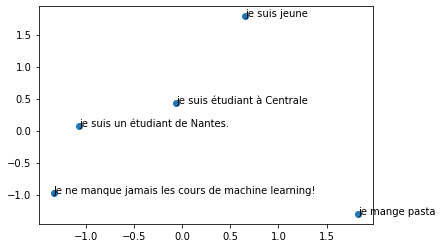

In [84]:
# Visualiser les phrases dans le premier plan factoriel
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.show()